In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tnfemesh.domain import (Curve,
                             Line2D,
                             CircularArc2D,
                             ParametricCurve2D,
                             VertexConnection2D,
                             CurveConnection,
                             DirichletBoundary2D,
                             Domain2D)
import torch as tn
import torchtt as tntt
from tnfemesh.mesh import bindex2dtuple, qindex2dtuple
from tnfemesh.tn_tools import range_meshgrid2d

In [2]:
func1 = lambda I: 1/(2+tn.sum(I+1,1).to(dtype=tn.float64))
I = tn.rand(2, 10)
val = func1(I)
print(I.shape)
print(val.shape)

torch.Size([2, 10])
torch.Size([2])


In [3]:
N = [2]*10
x = tntt.interpolate.dmrg_cross(func1, N, eps = 1e-7)

In [4]:
bindex = np.array([0, 1, 0, 1, 0, 0, 1, 0])
print(bindex2dtuple(bindex))

(8, 3)


Line2D(start=(0, 0), end=(1, 1))
CircularArc2D(center=(0, 0), radius=1, start_angle=1.5707963267948966, angle_sweep=1.5707963267948966)
ParametricCurve2D(x_func=<function <lambda> at 0xffff0792f420>, y_func=<function <lambda> at 0xffff0792db20>)


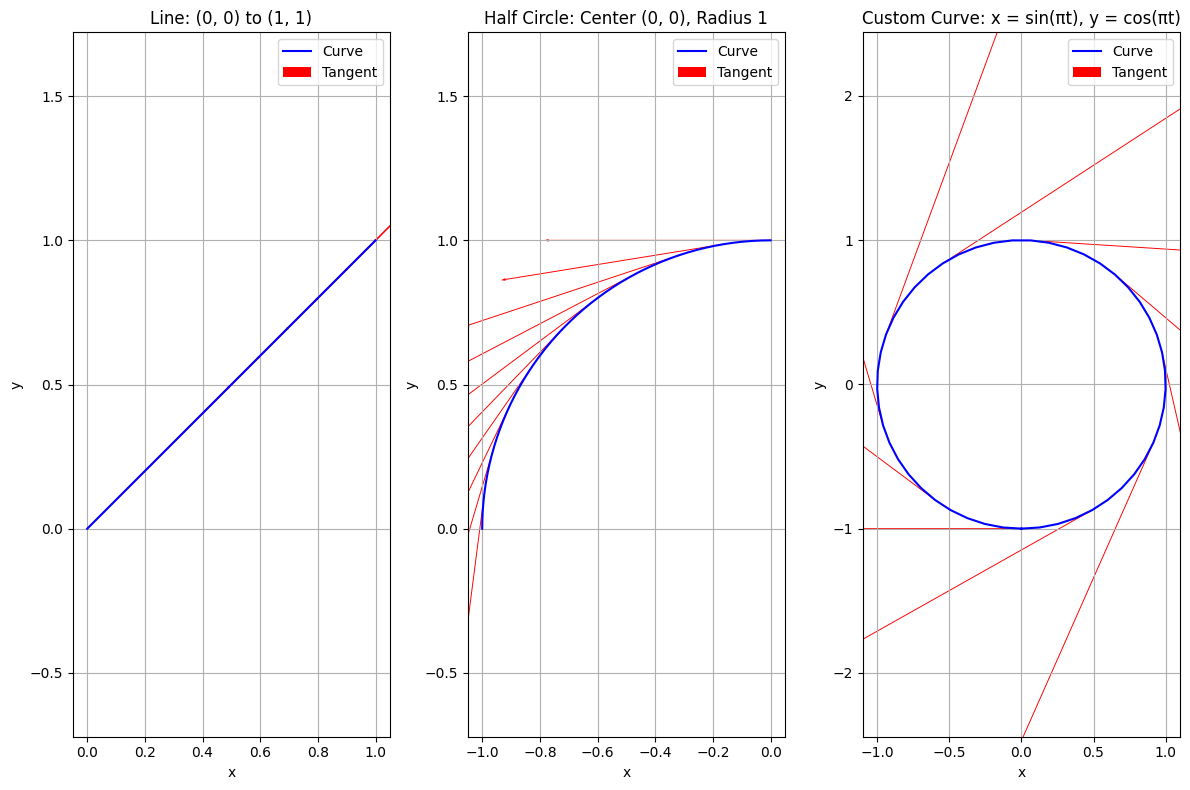

In [5]:
def plot_curve_with_tangents(curve, title, num_points=50):
    """
    Plot a curve and its tangent vectors on a 2D plane.

    Args:
        curve (Curve): An instance of a Curve object.
        title (str): Title of the plot.
        num_points (int): Number of points to sample along the curve.
    """
    # Sample points along the curve
    t_vals = np.linspace(-1, 1, num_points)
    points = curve.evaluate(t_vals)
    tangents = curve.tangent(t_vals)

    # Plot the curve
    plt.plot(points[:, 0], points[:, 1], label="Curve", color="blue")

    # Plot tangent vectors
    for i in range(0, num_points, max(1, num_points // 10)):  # Fewer vectors for clarity
        p = points[i]
        t = tangents[i]
        plt.quiver(
            p[0], p[1], t[0], t[1],
            angles='xy', scale_units='xy', scale=1.0, color='red', width=0.003, label="Tangent" if i == 0 else ""
        )

    # Plot setup
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.axis("equal")
    plt.legend()
    plt.grid()

# Create instances of different curves
line = Line2D((0, 0), (1, 1))
circular_arc = CircularArc2D((0, 0), 1, np.pi/2., 0.5*np.pi)
custom_curve = ParametricCurve2D(lambda t: np.sin(t * np.pi), lambda t: np.cos(t * np.pi))

print(line)
print(circular_arc)
print(custom_curve)

# Plot each curve
plt.figure(figsize=(12, 8))

plt.subplot(1, 3, 1)
plot_curve_with_tangents(line, "Line: (0, 0) to (1, 1)")

plt.subplot(1, 3, 2)
plot_curve_with_tangents(circular_arc, "Half Circle: Center (0, 0), Radius 1")

plt.subplot(1, 3, 3)
plot_curve_with_tangents(custom_curve, "Custom Curve: x = sin(πt), y = cos(πt)")

plt.tight_layout()
plt.show()


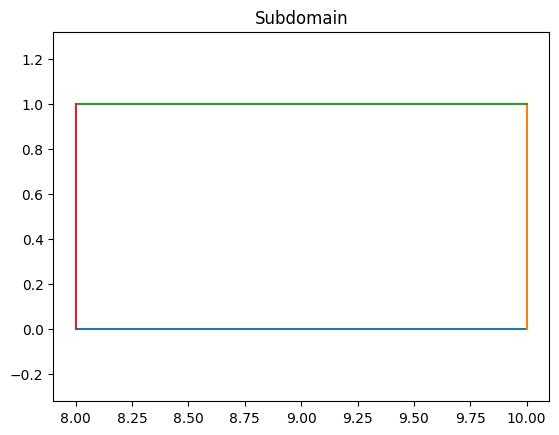

Quad(points=[array([8., 0.]), array([10.,  0.]), array([10.,  1.]), array([8., 1.])])


In [6]:
from tnfemesh.domain import RectangleFactory, QuadFactory

rectangle = RectangleFactory.create((8, 0), (10, 1))
rectangle.plot()
print(rectangle)

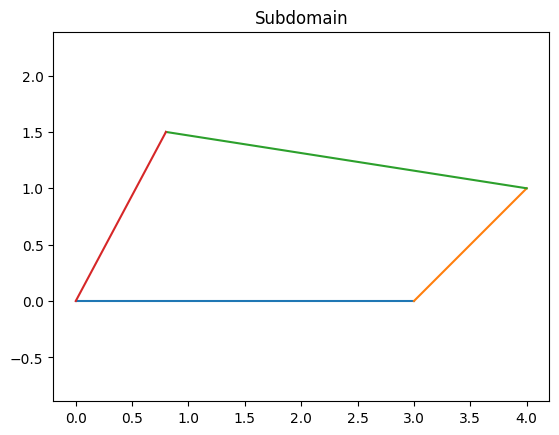

In [7]:
p1 = (0, 0)
p2 = (3, 0)
p3 = (4, 1)
p4 = (0.8, 1.5)

quad1 = QuadFactory.create(p1, p2, p3, p4)
quad1.plot()

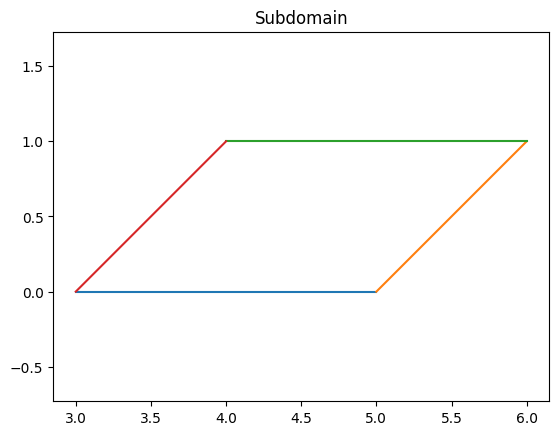

Quad(points=[array([3., 0.]), array([5., 0.]), array([6., 1.]), array([4., 1.])])


In [8]:
p1 = (3, 0)
p2 = (5, 0)
p3 = (6, 1)
p4 = (4, 1)

quad2 = QuadFactory.create(p1, p2, p3, p4)
quad2.plot()
print(quad2)

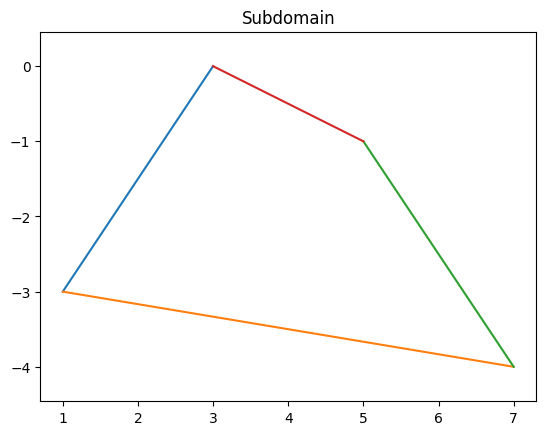

In [9]:
p1 = (3, 0)
p2 = (1, -3)
p3 = (7, -4)
p4 = (5, -1)

quad3 = QuadFactory.create(p1, p2, p3, p4)
quad3.plot()


Domain(4 subdomains, 2 connections)


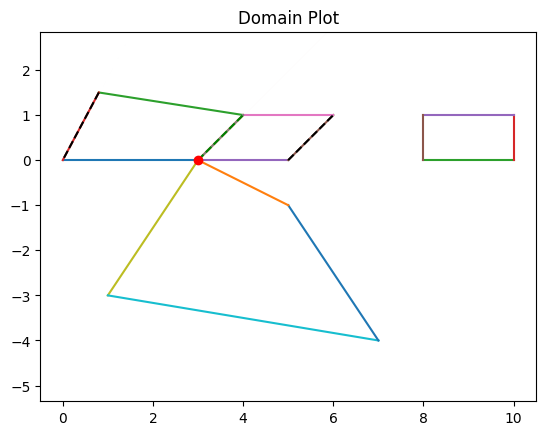

Domain(4 subdomains, 2 connections)
DirichletBoundary2D(num_bcs=2)


In [10]:
domain_idxs = [0, 1]
curve_idxs = [1, 3]
edge = CurveConnection(domain_idxs, curve_idxs)

vertex_idxs = [(0, 1, "start"), (1, 3, "end"), (2, 3, "end")]
vertex = VertexConnection2D(vertex_idxs)

bc = DirichletBoundary2D([(0, 3), (1, 1)])

domain = Domain2D([quad1, quad2, quad3, rectangle], [edge, vertex], bc)
print(domain)
domain.plot()
print(domain)
print(bc)

In [11]:
from tnfemesh.quadrature import GaussLegendre

order = 2
dimension = 2

points, weights = GaussLegendre.compute_points_weights(order, dimension)
qrule = GaussLegendre(order, dimension)
print("Gauss-Legendre points:")
print(points)
print("Gauss-Legendre weights:")
print(weights)

Gauss-Legendre points:
[[-0.57735027 -0.57735027]
 [-0.57735027  0.57735027]
 [ 0.57735027 -0.57735027]
 [ 0.57735027  0.57735027]]
Gauss-Legendre weights:
[1. 1. 1. 1.]


In [12]:
for p in points:
    print(p)

[-0.57735027 -0.57735027]
[-0.57735027  0.57735027]
[ 0.57735027 -0.57735027]
[0.57735027 0.57735027]


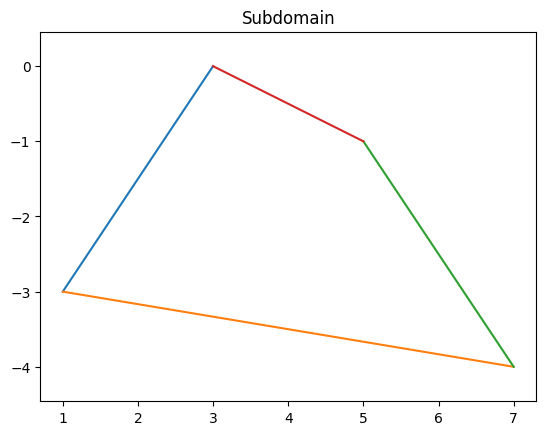

In [13]:
quad3.plot()

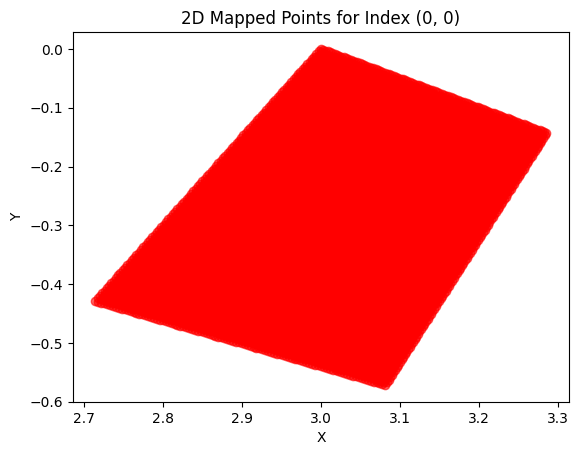

In [14]:
from tnfemesh.mesh import SubdomainMesh2D, QuadMesh
mesh_exponent = 3
subdmesh = SubdomainMesh2D(quad3, qrule, mesh_exponent)
subdmesh = QuadMesh(quad3, qrule, mesh_exponent)
index = (0, 0)

subdmesh.plot_element(index)

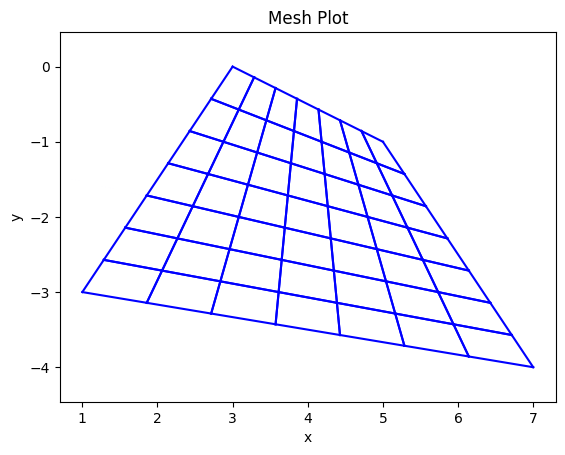

In [15]:
subdmesh.plot()

In [16]:
bindex = np.array([[0, 0, 0, 0], [0, 1, 0, 0], [1, 0, 0, 0], [1, 1, 0, 1]])
xi_eta = np.array([[0., 0.]])
tmp = subdmesh._cross_func(bindex, xi_eta)
print(tmp.shape)

(4, 2, 2)


/app/tnfemesh/mesh/subdomain_mesh.py:625: UserWarning: Index y=11 is out of bounds [0, 7). The last element is a padded element.
  warnings.warn(f"Index y={index_y} is out of bounds [0, {self.num_elements1d})."
/app/tnfemesh/mesh/subdomain_mesh.py:644: UserWarning: Reference coordinates are not in the range [-1, 1] within tolerance 1e-06. This behavior may be intentional when using tensorized Jacobians.
  warnings.warn(f"Reference coordinates are not in the range [-1, 1]"
/app/tnfemesh/domain/curve.py:40: UserWarning: Parameter values are not in the interval [-1, 1] within tolerance 1e-06. May lead to unexpected behavior.
  warnings.warn(f"Parameter values are not in the interval [-1, 1]"


In [17]:
J00 = subdmesh.ref2element_jacobian((0, 0), xi_eta)
J01 = subdmesh.ref2element_jacobian((0, 1), xi_eta)
J10 = subdmesh.ref2element_jacobian((1, 0), xi_eta)
J13 = subdmesh.ref2element_jacobian((1, 3), xi_eta)

print(J00)
print(J01)
print(J10)
print(J13)

[[[-0.12244898  0.16326531]
  [-0.21428571 -0.07142857]]]
[[[-0.08163265  0.16326531]
  [-0.21428571 -0.07142857]]]
[[[-0.12244898  0.20408163]
  [-0.21428571 -0.07142857]]]
[[[ 0.          0.20408163]
  [-0.21428571 -0.07142857]]]


In [18]:
print(subdmesh)
J = subdmesh.get_jacobian_tensor_networks()
print(len(J))
print(J[0][0][0].N)

QuadMesh(subdomain=Quad(points=[array([3., 0.]), array([ 1., -3.]), array([ 7., -4.]), array([ 5., -1.])]), quadrature_rule=Gauss-Legendre Quadrature Rule (order=2, dimension=2), mesh_size_exponent=3, num_points=64, num_elements=49)
4
[4, 4, 4]


In [19]:
print(subdmesh.tt_cross_config.info)

{}


In [20]:
from tnfemesh.tn_tools import test_accuracy_random
import warnings
num_test_pts = 100
shape = [2]*(2*mesh_exponent)
i, j = 1, 0
eval_point = subdmesh.quadrature_rule.get_points_weights()[0][1]
eval_point = eval_point.reshape(1, 2)
oracle = lambda idx: subdmesh._cross_func(idx, eval_point)[:, i, j]

with warnings.catch_warnings():
    warnings.simplefilter("ignore", UserWarning)
    error = test_accuracy_random(oracle, J[1][1][0].cores, num_test_pts, shape)
print("Relative error:", error)

Relative error: 4.0027522031189316e-16


In [21]:
from itertools import product
import numpy as np

num_quadrature_points = qrule.get_points_weights()[0].shape[0]
jacs = subdmesh.get_jacobian_tensors()

delta = 0.
for qindex in product((0, 3), repeat=mesh_exponent):
    qindex_array = np.array(qindex)
    index = qindex2dtuple(qindex_array)

    for q in range(num_quadrature_points):
        for i in range(2):
            for j in range(2):
                jtt = J[q, i, j]
                jtt = jtt.full()

                exact = jacs[index][q, i, j]
                approx = jtt[qindex]

                delta += np.abs(exact - approx)

print("delta: ", delta.item())
print(num_quadrature_points)

delta:  5.995204332975845e-15
4


In [22]:
jtt = J[q][i][j]
print(jtt.N)

[4, 4, 4]


In [23]:
jacdets = subdmesh.get_jacobian_dets()
jacinvdets = subdmesh.get_jacobian_invdets()
jacdettns = subdmesh.get_jacobian_det_tensor_networks()
jacinvdettns = subdmesh.get_jacobian_invdet_tensor_networks()


In [24]:
num_quadrature_points = qrule.get_points_weights()[0].shape[0]

deltas_det = 0.
deltas_invdet = 0.
for qindex in product((0, 3), repeat=mesh_exponent):
    qindex_array = np.array(qindex)
    index = qindex2dtuple(qindex_array)

    for q in range(num_quadrature_points):
        jdet = jacdettns[q]
        jdetinv = jacinvdettns[q]
        jdet = jdet.full()
        jdetinv = jdetinv.full()

        exact_det = jacdets[index][q]
        exact_invdet = jacinvdets[index][q]
        approx_det = jdet[qindex]
        approx_invdet = jdetinv[qindex]

        deltas_det += np.abs(exact_det - approx_det)
        deltas_invdet += np.abs(exact_invdet - approx_invdet)

print("delta_det: ", deltas_det.item())
print("delta_invdet: ", deltas_invdet.item())

delta_det:  6.800116025829084e-16
delta_invdet:  1.794120407794253e-13


In [25]:
xi_eta = np.array([[0., 0.], [0.5, 0.5], [1., 1.], [-1., -0.5]])
xi, eta = xi_eta[:, 0], xi_eta[:, 1]
index = (0, 0)
jac = subdmesh.ref2domain_jacobian(xi_eta)
jac = subdmesh.ref2element_jacobian(index, xi_eta)
print(jac)
print(subdmesh)

[[[-0.12244898  0.16326531]
  [-0.21428571 -0.07142857]]

 [[-0.1122449   0.17346939]
  [-0.21428571 -0.07142857]]

 [[-0.10204082  0.18367347]
  [-0.21428571 -0.07142857]]

 [[-0.13265306  0.14285714]
  [-0.21428571 -0.07142857]]]
QuadMesh(subdomain=Quad(points=[array([3., 0.]), array([ 1., -3.]), array([ 7., -4.]), array([ 5., -1.])]), quadrature_rule=Gauss-Legendre Quadrature Rule (order=2, dimension=2), mesh_size_exponent=3, num_points=64, num_elements=49)


In [26]:
def test_numerical_jacobian(func, xi_eta: np.ndarray, epsilon: float = 1e-6) -> None:
    num_samples = xi_eta.shape[0]
    numerical_jacobians = np.zeros((num_samples, 2, 2))

    for i, (xi, eta) in enumerate(xi_eta):
        xi_eta_0 = np.array([[xi, eta]])
        xi_eta_dxi = np.array([[xi + epsilon, eta]])
        xi_eta_deta = np.array([[xi, eta + epsilon]])

        xy_base = func(xi_eta_0).flatten()
        x_dxi = func(xi_eta_dxi).flatten()[0]
        y_dxi = func(xi_eta_dxi).flatten()[1]
        x_deta = func(xi_eta_deta).flatten()[0]
        y_deta = func(xi_eta_deta).flatten()[1]

        dx_dxi = (x_dxi - xy_base[0]) / epsilon
        dy_dxi = (y_dxi - xy_base[1]) / epsilon
        dx_deta = (x_deta - xy_base[0]) / epsilon
        dy_deta = (y_deta - xy_base[1]) / epsilon

        numerical_jacobians[i] = np.array([[dx_dxi, dx_deta], [dy_dxi, dy_deta]])


    for i in range(num_samples):
        print(f"Sample {i + 1}:")
        print("Numerical Jacobian:")
        print(numerical_jacobians[i])

func = lambda xi_eta: subdmesh.ref2domain_map(xi_eta)
func = lambda xi_eta: subdmesh.ref2element_map(index, xi_eta)

test_numerical_jacobian(func, xi_eta)

Sample 1:
Numerical Jacobian:
[[-0.12244898  0.16326531]
 [-0.21428571 -0.07142857]]
Sample 2:
Numerical Jacobian:
[[-0.1122449   0.17346939]
 [-0.21428571 -0.07142857]]
Sample 3:
Numerical Jacobian:
[[-0.10204082  0.18367347]
 [-0.21428571 -0.07142857]]
Sample 4:
Numerical Jacobian:
[[-0.13265306  0.14285714]
 [-0.21428571 -0.07142857]]


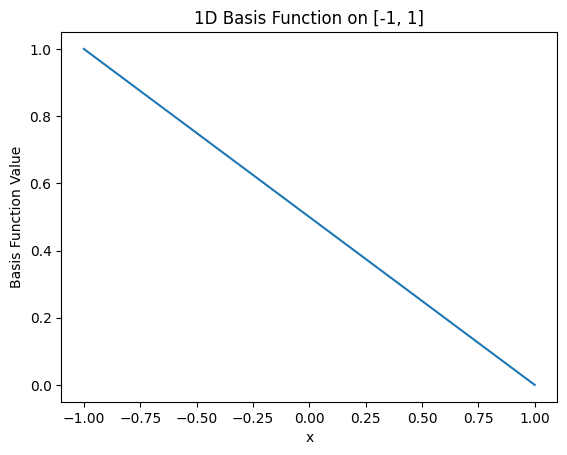

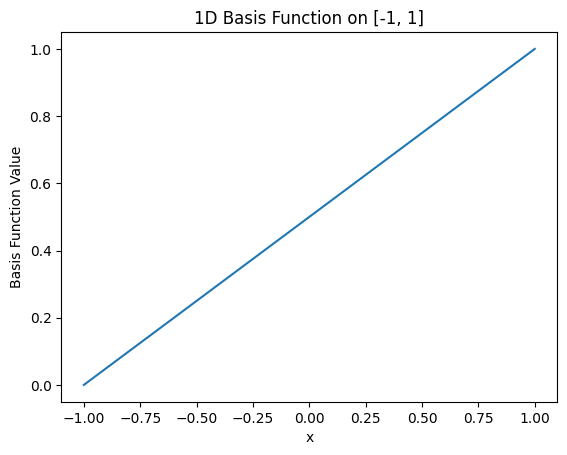

In [27]:
from tnfemesh.basis import LinearBasis1D, LinearBasis2D
basis1d = LinearBasis1D()
basis2d = LinearBasis2D()

# Plot the basis functions
for i in range(2):
    basis1d.plot(i)

In [28]:
print(basis1d.index_range)
print(basis2d.index_range)

range(0, 2)
[range(0, 2), range(0, 2)]


In [29]:
d = 2
size = 2**d
W0, W1 = basis1d.get_all_index_ttmaps(d)
W0_reshaped = np.reshape(W0.full(), (-1, size), order="F")
W1_reshaped = np.reshape(W1.full(), (-1, size), order="F")
print(W0_reshaped)
print(W1_reshaped)

tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 0.]], dtype=torch.float64)
tensor([[0., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.]], dtype=torch.float64)


In [30]:
d = 3
Ws = basis2d.get_all_index_ttmaps(d)
size = 4**d
Out = np.empty((size, size))
meshgrid = range_meshgrid2d(d)
XX, YY = meshgrid
size = 2**d
vecx = np.array(XX.full()).flatten("F")
vecy = np.array(YY.full()).flatten("F")
z2tuples = list(zip(vecx, vecy))
xlen = 2**d
def index_map(pair):
    i, j = pair
    idx = int(j*xlen + i)
    return idx
zmap = [index_map(pair) for pair in z2tuples]

W = Ws[1, 1]
size = 4**d
W = np.array(W.full()).reshape((size, size), order="F")
Out = np.empty((size, size))
Out[np.ix_(zmap, zmap)] = W
W = Out.reshape((2**d, 2**d, 2**d, 2**d), order="F")

rows1, rows2, cols1, cols2 = np.where(W == 1.)
for r1, r2, c1, c2 in zip(rows1, rows2, cols1, cols2):
    print(f"({c1}, {c2}) -> ({r1}, {r2})")

(0, 0) -> (1, 1)
(0, 1) -> (1, 2)
(0, 2) -> (1, 3)
(0, 3) -> (1, 4)
(0, 4) -> (1, 5)
(0, 5) -> (1, 6)
(0, 6) -> (1, 7)
(1, 0) -> (2, 1)
(1, 1) -> (2, 2)
(1, 2) -> (2, 3)
(1, 3) -> (2, 4)
(1, 4) -> (2, 5)
(1, 5) -> (2, 6)
(1, 6) -> (2, 7)
(2, 0) -> (3, 1)
(2, 1) -> (3, 2)
(2, 2) -> (3, 3)
(2, 3) -> (3, 4)
(2, 4) -> (3, 5)
(2, 5) -> (3, 6)
(2, 6) -> (3, 7)
(3, 0) -> (4, 1)
(3, 1) -> (4, 2)
(3, 2) -> (4, 3)
(3, 3) -> (4, 4)
(3, 4) -> (4, 5)
(3, 5) -> (4, 6)
(3, 6) -> (4, 7)
(4, 0) -> (5, 1)
(4, 1) -> (5, 2)
(4, 2) -> (5, 3)
(4, 3) -> (5, 4)
(4, 4) -> (5, 5)
(4, 5) -> (5, 6)
(4, 6) -> (5, 7)
(5, 0) -> (6, 1)
(5, 1) -> (6, 2)
(5, 2) -> (6, 3)
(5, 3) -> (6, 4)
(5, 4) -> (6, 5)
(5, 5) -> (6, 6)
(5, 6) -> (6, 7)
(6, 0) -> (7, 1)
(6, 1) -> (7, 2)
(6, 2) -> (7, 3)
(6, 3) -> (7, 4)
(6, 4) -> (7, 5)
(6, 5) -> (7, 6)
(6, 6) -> (7, 7)


In [33]:
from tnfemesh.tn_tools.numeric import integer_to_little_endian
from tnfemesh.tn_tools import unit_vector_tt

num = 15
n = 4
bits = integer_to_little_endian(n, num)
print(bits)

ej = unit_vector_tt(n, num)
print(np.array(ej.full()).flatten("F"))

[1, 1, 1, 1]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
